In [2]:
import numpy as np               
import pandas as pd 
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
# - This package is large and takes some time to download, take the lighter version below.
# nltk.download()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [3]:
reviews = pd.read_csv("imdbReviews.csv")

In [4]:
reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [5]:
reviews.shape

(2000, 4)

In [6]:
reviews['Sentiment'].value_counts()

Sentiment
POS    1000
NEG    1000
Name: count, dtype: int64

In [11]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[1 1 1 1 1 1 1 1 1 1]
0    POS
1    POS
2    POS
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    POS
Name: Sentiment, dtype: object


Preprocess the text and observe its transformation.

In [13]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [14]:
reviews.dtypes

Index                 int64
URL                  object
Text         string[python]
Sentiment            object
dtype: object

In [15]:
#get the review text for preprocessing
text = reviews['Text']
text[:5]

0    Girlfight follows a project dwelling New York ...
1    Hollywood North is an euphemism from the movie...
2    That '70s Show is definitely the funniest show...
3    9/10- 30 minutes of pure holiday terror. Okay,...
4    A series of random, seemingly insignificant th...
Name: Text, dtype: string

In [17]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
text1[:5]

['girlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more although the film is not about boxing boxing is all about the film so much so you can almost smell the sweat technically and artistically a good shoot with an sense of honesty and reality about it girlfight is no chick flick and no rocky it is rather a very human drama which even viewers who dont know boxing will be able to connect withgirlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more',
 'hollywood north is an euphemism from the movie industry as they went to canada to make movies because of tax breaks and cheaper costs in a civilized city like toronto in this case later in vancouver peter obrian the director probably saw a lot of the invaders from california that this movie seems to be the right 

In [18]:
text1 = pd.Series(text1)
text1[:5]

0    girlfight follows a project dwelling new york ...
1    hollywood north is an euphemism from the movie...
2    that s show is definitely the funniest show cu...
3      minutes of pure holiday terror okay so its n...
4    a series of random seemingly insignificant the...
dtype: object

In [20]:
#remove stop words
nltk.download('stopwords')    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism movie industry went ...
2    show definitely funniest show currently tv sta...
3    minutes pure holiday terror okay scary sure fu...
4    series random seemingly insignificant thefts s...
dtype: object

In [29]:
#apply lemmatising
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5] #notice that it does not do a good job

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism movie industry went ...
2    show definitely funniest show currently tv sta...
3    minute pure holiday terror okay scary sure fun...
4    series random seemingly insignificant theft si...
dtype: object

In [30]:
#apply lemmatising with POS tags

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5] #notice that it does a better job

0    girlfight follow project dwell new york high s...
1    hollywood north euphemism movie industry go ca...
2    show definitely funniest show currently tv sta...
3    minute pure holiday terror okay scary sure fun...
4    series random seemingly insignificant theft si...
dtype: object

In [25]:
#apply stemming
ps = nltk.PorterStemmer()

text4 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
text4[:5]

0    girlfight follow project dwell new york high s...
1    hollywood north euphem movi industri went cana...
2    show definit funniest show current tv start wa...
3    minut pure holiday terror okay scari sure funt...
4    seri random seemingli insignific theft sister ...
dtype: object

In [26]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,girlfight follow project dwell new york high s...,1
1,hollywood north euphemism movie industry go ca...,1
2,show definitely funniest show currently tv sta...,1
3,minute pure holiday terror okay scary sure fun...,1
4,series random seemingly insignificant theft si...,1
...,...,...
1995,tourist head ireland school trip learn druid e...,0
1996,two film useful scar people god event horizon ...,0
1997,ulises literature teacher arrives coastal town...,0
1998,um okay guess get whole shakycam gorillastyle ...,0


In [27]:
#transform text into BoW with count features
cv=CountVectorizer()

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

#see the features
cv.get_feature_names_out()

array(['aa', 'aaa', 'aadha', ..., 'ís', 'ísnt', 'øif'], dtype=object)

In [28]:
print(cv_reviews)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 198906 stored elements and shape (2000, 28579)>
  Coords	Values
  (0, 10339)	2
  (0, 9534)	2
  (0, 19909)	2
  (0, 7467)	2
  (0, 17201)	2
  (0, 28378)	2
  (0, 11622)	2
  (0, 22036)	2
  (0, 10338)	2
  (0, 22398)	3
  (0, 9990)	2
  (0, 28121)	2
  (0, 805)	2
  (0, 2991)	5
  (0, 9291)	2
  (0, 22305)	2
  (0, 8221)	2
  (0, 20137)	2
  (0, 16739)	3
  (0, 782)	1
  (0, 9139)	2
  (0, 730)	1
  (0, 23227)	1
  (0, 24639)	1
  (0, 24937)	1
  :	:
  (1999, 17901)	1
  (1999, 24087)	3
  (1999, 19071)	2
  (1999, 14709)	1
  (1999, 1838)	1
  (1999, 25271)	2
  (1999, 228)	1
  (1999, 6426)	1
  (1999, 21425)	1
  (1999, 1571)	3
  (1999, 26060)	3
  (1999, 8425)	1
  (1999, 14113)	1
  (1999, 14639)	1
  (1999, 18860)	1
  (1999, 18657)	2
  (1999, 26524)	2
  (1999, 2960)	1
  (1999, 13572)	2
  (1999, 24239)	2
  (1999, 16055)	2
  (1999, 17196)	1
  (1999, 5228)	1
  (1999, 3548)	1
  (1999, 22124)	1


In [31]:
cv_reviews.shape

(2000, 28579)

In [32]:
#to see the data in the typical tabular format
df =  pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aa,aaa,aadha,aag,aames,aamess,aap,aapke,aardman,aaron,...,zwick,zyuranger,zz,zzzzzzzzas,½th,ème,éme,ís,ísnt,øif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
cv=CountVectorizer(max_features=10000)

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

cv_reviews.shape

(2000, 10000)

In [34]:
# Trasform text into Tfidf representations
tv=TfidfVectorizer()

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

print(tv.get_feature_names_out())

['aa' 'aaa' 'aadha' ... 'ís' 'ísnt' 'øif']


In [35]:
tv_reviews.shape

(2000, 28579)

In [36]:
print(tv_reviews[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43 stored elements and shape (1, 28579)>
  Coords	Values
  (0, 10339)	0.23599904548501013
  (0, 9534)	0.12328725924287892
  (0, 19909)	0.1589620310023393
  (0, 7467)	0.23599904548501013
  (0, 17201)	0.1003737272158848
  (0, 28378)	0.15631338675535297
  (0, 11622)	0.1186011272081776
  (0, 22036)	0.14158270050452604
  (0, 10338)	0.1104909870608452
  (0, 22398)	0.18179817779740934
  (0, 9990)	0.26692651093721265
  (0, 28121)	0.10842545967564825
  (0, 805)	0.19469308105019215
  (0, 2991)	0.5746129125123848
  (0, 9291)	0.09221646917768214
  (0, 22305)	0.164978424955664
  (0, 8221)	0.2298451650049539
  (0, 20137)	0.1589620310023393
  (0, 16739)	0.11385389746728052
  (0, 782)	0.05652139923975841
  (0, 9139)	0.047948389292251495
  (0, 730)	0.05492093645430386
  (0, 23227)	0.10630166051693607
  (0, 24639)	0.10807977176191656
  (0, 24937)	0.10807977176191656
  (0, 1400)	0.11799952274250507
  (0, 10496)	0.03330332324814635
  (0, 22765)

In [37]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
tv=TfidfVectorizer(max_features=10000)

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

tv_reviews.shape

(2000, 10000)

In [38]:
#get to top n features with the highest tf-idf 
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movie', 'film', 'one', 'see', 'like', 'make', 'bad', 'watch',
       'get', 'time'], dtype=object)]


In [39]:
df1 =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

df1['movie'].describe()

count    2000.000000
mean        0.059044
std         0.070682
min         0.000000
25%         0.000000
50%         0.033547
75%         0.095979
max         0.539570
Name: movie, dtype: float64

<Axes: >

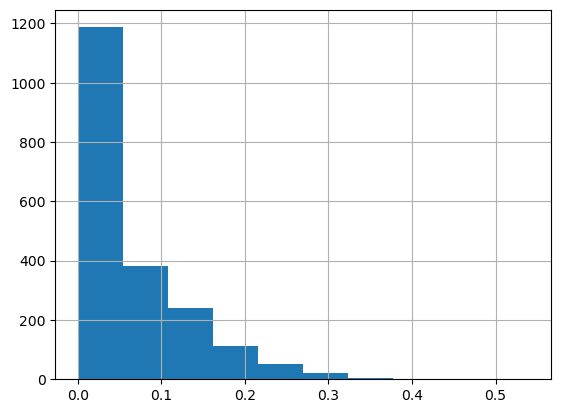

In [40]:
df1['movie'].hist()

In [41]:
df1['film'].describe()

count    2000.000000
mean        0.052946
std         0.060337
min         0.000000
25%         0.000000
50%         0.034035
75%         0.085321
max         0.419654
Name: film, dtype: float64